# Diurnal Histogram

In [1]:
import pandas as pd
import glob

In [3]:
#load wrf-bcc dataframes
df_HIST = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/HIST_UVV_[21]*_*')), ignore_index=True)
df_8p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC8p5_UVV*')), ignore_index=True)
df_4p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC4p5_UVV*')), ignore_index=True)
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)
df_4p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC4p5_UVV*')), ignore_index=True)

#iterate through the epochs and threshold each based on UVV value
epochs = ['HIST', '4p5MID', '8p5MID', '4p5END', '8p5END']

for epoch in epochs:
    locals()[f'df_{epoch}'] = locals()[f'df_{epoch}'][((locals()[f'df_{epoch}']['DBZ'] >= 40.0) & (locals()[f'df_{epoch}']['UVV'] >= 25.0))]
    locals()[f'df_{epoch}']['Time'] = pd.to_datetime( locals()[f'df_{epoch}']['Time'])
    locals()[f'df_{epoch}']['Month'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.month
    locals()[f'df_{epoch}']['Hour'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.hour
    

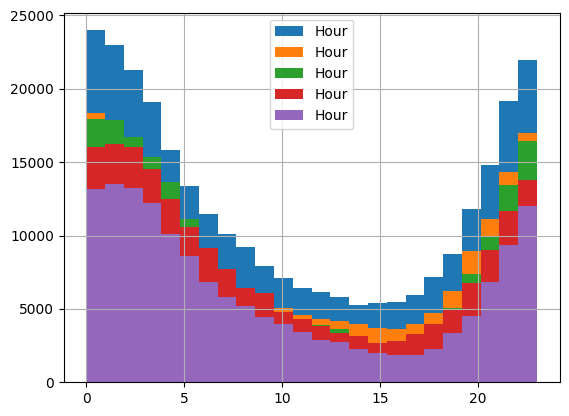

In [8]:
epochs = ['8p5END', '4p5END', '8p5MID', '4p5MID', 'HIST']

for epoch in epochs:
    locals()[f'df_{epoch}']['Hour'].hist(bins=24, legend=True)

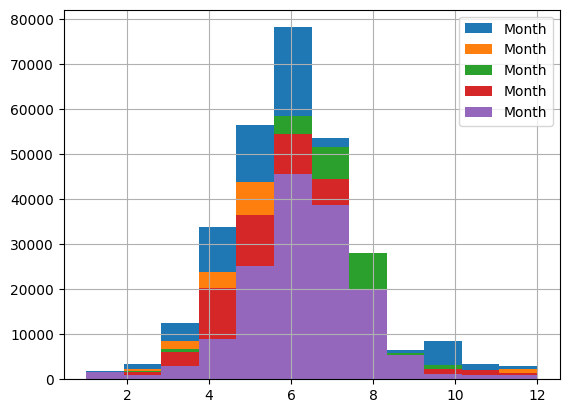

In [9]:
epochs = ['8p5END', '4p5END', '8p5MID', '4p5MID', 'HIST']

for epoch in epochs:
    locals()[f'df_{epoch}']['Month'].hist(bins=12, legend=True)